### Questions

### Objectives
YWBAT
- measure the correct number of clusters to use
- *use various metrics to decide cluster numbers and create a pipeline for new data points*
- apply different clustering techniques and compare to kmeans

### Outline

In [2]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, mean_shift
from sklearn.metrics import calinski_harabaz_score
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
# make a dataset with 20 features and 3 groups 
X, y = make_blobs(n_features= 20, n_samples= 3000, centers = np.random.randint(3, 10), cluster_std=4.0)

In [4]:
X.shape, y.shape

((3000, 20), (3000,))

In [5]:
# let's visualize our data
pca = PCA(n_components = 2)
transformed = pca.fit_transform(X)
transformed[:5]

array([[ 15.94299491, -13.70992791],
       [ -8.02312288,  16.60030623],
       [ -4.18320148, -14.24187424],
       [ 11.99598466,  -6.15138451],
       [ 16.77609232, -17.198888  ]])

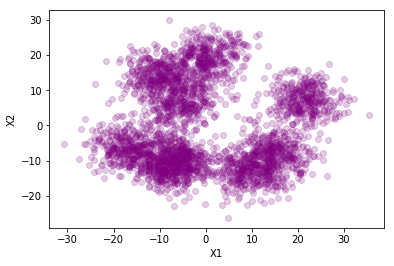

In [6]:
plt.scatter(x = transformed[:,0],y = transformed[:,1], alpha=0.2, c='purple')
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

# how many clusters exist?
4, 5 or 6

In [7]:
color_dict = {0:"green", 1: "yellow", 2: "black", 3: "purple", 4: "orange", 5: "red", 6:"pink"}

### Let's get some clusters

In [10]:
def view_clusters(n_clusters=3, n_components=2, plotting=False):
    kmean = KMeans(n_clusters=n_clusters)
    pca = PCA(n_components=n_components)
    X_t = pca.fit_transform(X)
    kmean.fit(X_t)
    labels = kmean.labels_
    if plotting:
        color_vec = [color_dict[l] for l in labels]
        plt.scatter(x = transformed[:,0],y = transformed[:,1], alpha=0.2, c=color_vec)
        plt.grid()
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.show()
    return kmean

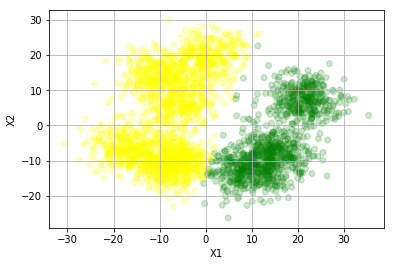

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
view_clusters(2, n_components=2, plotting=True)

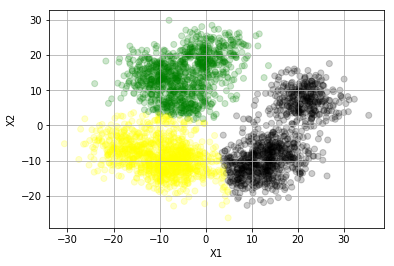

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
view_clusters(3, n_components=2, plotting=True)

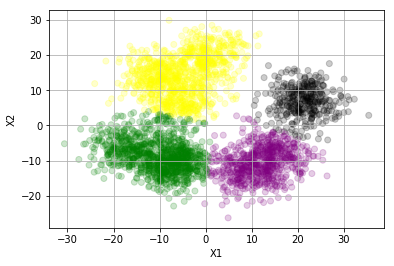

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
view_clusters(4, n_components=2, plotting=True)

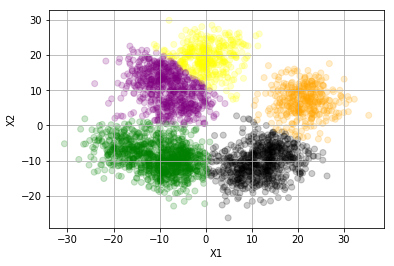

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
view_clusters(5, n_components=2, plotting=True)

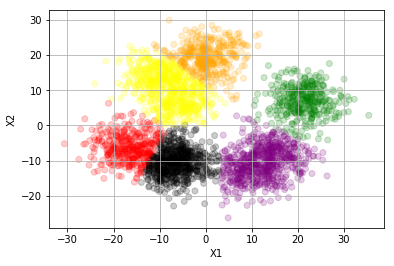

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
view_clusters(6, n_components=2, plotting=True)

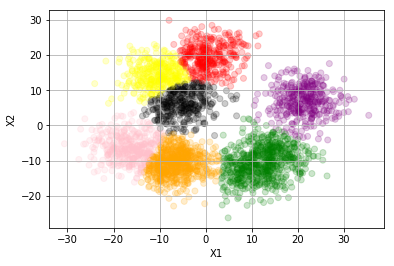

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
view_clusters(7, n_components=2, plotting=True)

### How do we choose the number of clusters?

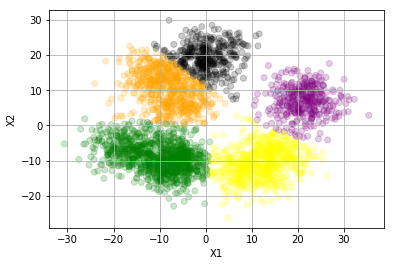

In [20]:
k = view_clusters(5, plotting=True)

In [23]:
inertias = []
num_clusters = 21
for i in range(1, num_clusters):
    k = view_clusters(i, n_components=2)
    inertia = k.inertia_
    inertias.append(inertia)

In [25]:
set(y)

{0, 1, 2, 3, 4, 5, 6, 7, 8}

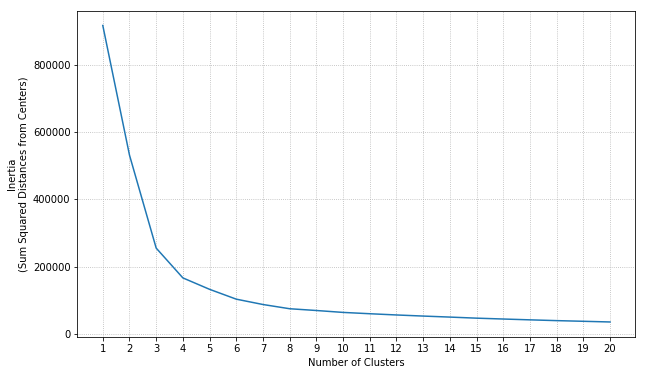

In [24]:
plt.figure(figsize=(10, 6))
plt.grid(linestyle=':')
plt.plot(range(1, num_clusters), inertias)
plt.xticks(range(1, num_clusters), range(1, num_clusters, 1))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia\n(Sum Squared Distances from Centers)")
plt.show()

### Comparing Kmeans to KMedians

In [27]:
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster.dbscan import dbscan
from pyclustering.cluster.ema import ema
from pyclustering.cluster import cluster_visualizer, cluster_visualizer_multidim
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES

In [110]:
radius_vals = list(range(5, 31))

In [118]:
# generating 5 random starting points for our kmedians algorithm
cluster_vals = []
for radius in radius_vals:
    idx = np.random.randint(0, X.shape[0], 5)
    # clustering_instance = kmedians(X, initial_centers=X[idx,:])
    clustering_instance = dbscan(X, radius, 5)
    # clustering_instance = ema(X, amount_clusters=5)

    #Run cluster analysis and obtain results.
    clustering_instance.process()
    clusters = clustering_instance.get_clusters()
    cluster_vals.append(len(clusters))

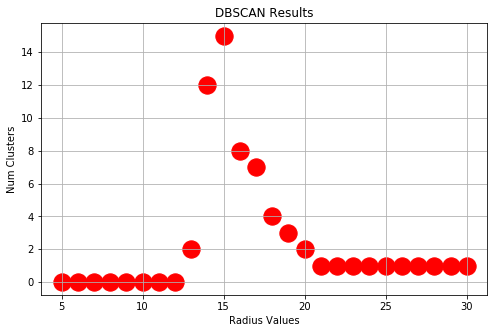

In [119]:
plt.figure(figsize=(8, 5))
plt.grid(zorder=0)
plt.scatter(radius_vals, cluster_vals, s=300, c='r')
plt.xlabel("Radius Values")
plt.ylabel("Num Clusters")
plt.title("DBSCAN Results")
plt.show()

In [142]:
idx = np.random.randint(0, X.shape[0], 5)
# clustering_instance = kmedians(X, initial_centers=X[idx,:])
# clustering_instance = dbscan(X, 16, 5)
clustering_instance = ema(X, amount_clusters=8)

#Run cluster analysis and obtain results.
clustering_instance.process()
clusters = clustering_instance.get_clusters()

In [143]:
len(clusters)

8

In [144]:
clusters[0][:3] # Notice these values are the indices of the points in the cluster from X

[255, 493, 625]

In [145]:
clusters_ = []
for cluster in clusters:
    clusters_.append(X[cluster,:])

In [148]:
len(clusters_)

8

In [149]:
clusters_[0][:5] # these are the points from X that correspond to the indices from above

array([[  9.61485154,   2.74878149,   5.08690651,  -0.41519675,
         -1.40413576,  -7.49795791,   3.4703005 ,   6.33757056,
          8.4454975 ,   5.14819537,   1.58274885,  -3.15639241,
         -6.13368207,  -4.96972329,  -2.18397916,   2.40687876,
         -2.56405529,  -8.73088799,   2.3607902 , -18.69298432],
       [  9.85753094,  12.4044614 ,  -5.13272944,   3.38137849,
         -5.53653147, -11.18780889,   3.77013867,   1.35189685,
         10.68161726,  11.2990814 , -12.59621565, -12.84451041,
        -10.69334025,  -6.49767822,   5.81653845, -12.3486665 ,
         10.19806443, -11.94245236,   4.54421123, -13.05446963],
       [  7.71966102,   5.63016713,   5.52902717,   6.24090713,
         -7.21352948,   1.98610975,   3.55601991,  10.30733921,
          9.20094039,   1.02204124,  -2.20227965,  -4.3088646 ,
         -8.89622155,  -8.25337343,   6.11834809,   4.58681988,
         10.86588008, -15.85594464,   5.07498157,  -7.85947097],
       [ 15.98808654,  13.91316594,  

In [150]:
pca = PCA(n_components=2)

In [151]:
X_t = pca.fit_transform(X)

In [152]:
# grouping our transformed data into their respective clusters
clusters_ = []
for cluster in clusters:
    clusters_.append(X_t[cluster,:])

### New heading

In [153]:
colors = ['red', 'green', 'blue', 'yellow', 'pink', 'orange', 'magenta', 'purple', 'black', 'teal']

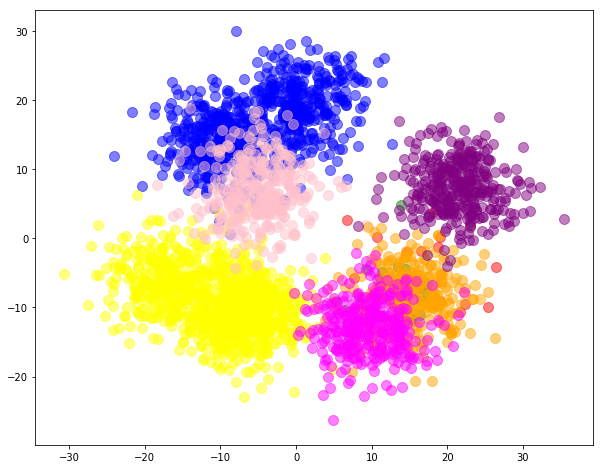

In [154]:
plt.figure(figsize=(10, 8))
for cluster, color in zip(clusters_, colors):
    plt.scatter(cluster[:, 0], cluster[:, 1], c=color, s=100, alpha=0.5)
plt.show()

Read more about clustering algorithms here

https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

install **pyclustering** using `pip install pyclustering`

documentation here

https://codedocs.xyz/annoviko/pyclustering/classpyclustering_1_1cluster_1_1kmedians_1_1kmedians.html


Article on Kmeans vs KMedians

http://worldcomp-proceedings.com/proc/p2015/CSC2663.pdf

### Assessment

# if you want to cluster using cosine similarity 

`from scipy.cluster import heirarchy`

heirarchy(metric='cosine')